In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from pandas_profiling import ProfileReport
import plotly.express as px

In [54]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
life_df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/life-expectancy-income.csv')
lite_df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/literacy-rates.csv')

In [56]:
life_df.describe()

,Life expectancy(In Years),Per Capita Income(In USD)
count,75.000000,75.000000
mean,68.405333,1079.826667
std,2.251472,443.052171
min,61.200000,487.000000
25%,67.285000,797.500000
50%,68.550000,1007.000000
75%,70.190000,1219.000000
max,72.900000,3166.000000


In [57]:
lite_df.columns
lite_df

,District,Total,Female,Male,Year
0,Kathmandu,86.3,79.8,92.2,2013
1,Lalitpur,82.5,74.7,90.1,2013
2,Kaski,82.4,75.4,90.1,2013
3,Bhaktapur,81.7,72.7,90.5,2013
4,Ilam,77.9,72.0,84.2,2013
5,Chitawan,77.0,70.7,83.9,2013
6,Syangja,76.6,69.6,86.1,2013
7,Palpa,76.2,69.5,84.9,2013
8,Jhapa,75.1,68.6,82.3,2013
9,Manang,74.8,64.2,83.0,2013


In [58]:
lite_df.describe()

,Total,Female,Male,Year
count,75.0000,75.000000,75.000000,75.0
mean,65.1120,56.053333,75.016000,2013.0
std,9.5331,11.199968,8.464617,0.0
min,41.7000,32.000000,50.900000,2013.0
25%,57.0500,47.600000,69.300000,2013.0
50%,66.2000,57.100000,76.200000,2013.0
75%,71.9000,64.350000,80.900000,2013.0
max,86.3000,79.800000,92.200000,2013.0


In [59]:
import plotly.express as px

def plot_hist(data,column_name):

  fig = px.histogram(data,x=data[column_name],title=column_name)
  fig.show()

plot_hist(life_df,'Life expectancy(In Years)')
plot_hist(life_df,'Per Capita Income(In USD)')
plot_hist(lite_df,'Female')
plot_hist(lite_df,'Male')

Text(0.5, 1.0, 'Literacy Distribution Plot ')

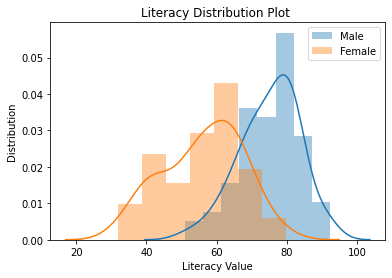

In [60]:
sns.distplot(lite_df['Male'],hist=True, label="Male")
sns.distplot(lite_df['Female'],hist=True, label="Female")
plt.legend()
plt.ylabel("Distribution")
plt.xlabel("Literacy Value")
plt.title('Literacy Distribution Plot ')

Joint Plot

No handles with labels found to put in legend.


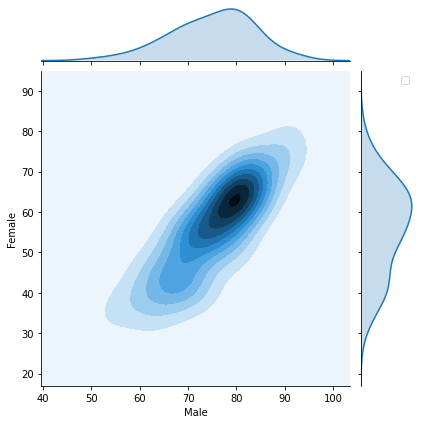

In [61]:
sns.jointplot(x=lite_df['Male'],y=lite_df['Female'],kind="kde")
plt.legend()
# plt.title('Density Distribution Chart Male Female')

In [0]:
lite_df['District']=lite_df['District'].str.rstrip()

In [63]:
lite_df['District']

0          Kathmandu
1           Lalitpur
2              Kaski
3          Bhaktapur
4               Ilam
5           Chitawan
6            Syangja
7              Palpa
8              Jhapa
9             Manang
10            Tanahu
11         Terhathum
12          Dhankuta
13            Parbat
14           Surkhet
15      Arghakhanchi
16             Gulmi
17         Panchthar
18           Baglung
19            Myagdi
20         Taplejung
21           Lamjung
22       Nawalparasi
23        Kanchanpur
24            Morang
25              Dang
26    Kavrepalanchok
27         Rupandehi
28     Sankhuwasabha
29           Bhojpur
30           Khotang
31          Udayapur
32           Sunsari
33         Makwanpur
34           Pyuthan
35            Gorkha
36           Kailali
37           Mustang
38           Bardiya
39          Darchula
40        Dadeldhura
41       Okhaldhunga
42        Solukhumbu
43            Salyan
44           Baitadi
45           Dhading
46           Dolakha
47           

In [64]:
# set(lite_df['District'].unique()).difference(life_df['District'].unique())
set(life_df['District'].unique()).difference(lite_df['District'].unique())

{'Chitwan', 'Tehrathum'}

In [0]:
lite_df['District']=lite_df['District'].map(lambda x: 'Chitwan' if x=='Chitawan' else x)
lite_df['District']=lite_df['District'].map(lambda x: 'Tehrathum' if x=='Terhathum' else x)

In [0]:
lite_df.drop([' Year'],axis=1,inplace=True)

In [0]:
mixed_df = pd.merge(lite_df,life_df,on='District',how='inner')
mixed_df.columns=mixed_df.columns.str.strip()

In [0]:
# mixed_df.drop([' Year'],inplace=True,axis=1)

In [69]:
mixed_df.columns

Index(['District', 'Total', 'Female', 'Male', 'Life expectancy(In Years)',
       'Per Capita Income(In USD)'],
      dtype='object')

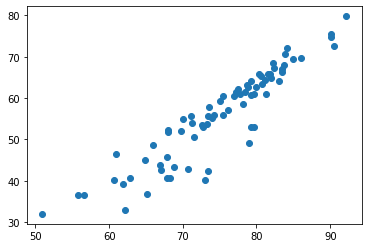

In [70]:
plt.scatter(x='Male',y='Female',data=lite_df)
plt.show()

# plt.scatter(life_df['Life expectancy(In Years)'],life_df['Per Capita Income(In USD)'])
colors = ['cyan', 'red', 'green', 'blue', 'orange', 'deeppink', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])


fig=px.scatter(lite_df, x='Male',y='Female',hover_data=['District'],width=600, height=600)
fig.update_layout(
    title="Male Vs Female Literacy Rate",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    ),
)
fig.show()

Text(0.5, 1.0, '\nCorrelation of Life Expectancy, Per Capita with Gender')

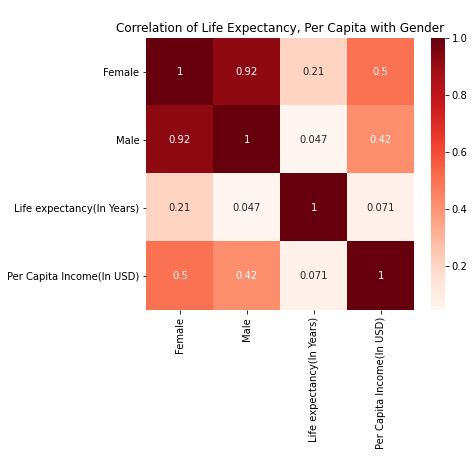

In [71]:
plt.figure(figsize=(6,5))
cor=mixed_df.drop(columns=['Total']).corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.title('\nCorrelation of Life Expectancy, Per Capita with Gender')

In [72]:
mixed_df.tail()

,District,Total,Female,Male,Life expectancy(In Years),Per Capita Income(In USD)
70,Siraha,50.2,39.2,61.9,71.29,689
71,Humla,47.8,33.0,62.1,64.15,794
72,Mahottari,46.4,36.6,56.6,69.47,681
73,Sarlahi,46.3,36.6,55.8,70.06,809
74,Rautahat,41.7,32.0,50.9,70.99,757


In [73]:
px.scatter_3d(mixed_df, x='Female', y='Life expectancy(In Years)', z='Per Capita Income(In USD)',color=mixed_df['Female'],hover_data=['District'])


In [74]:
px.scatter_3d(mixed_df, x='Male', y='Life expectancy(In Years)', z='Per Capita Income(In USD)',color=mixed_df['Male'],hover_data=['District'])
# fig.update_layout(
#     title="Per Capita, Life Expectancy vs Male Literacy",
#     font=dict(
#         family="Courier New, monospace",
#         size=10,
#         color="#7f7f7f"
#     ),
# )

## Standarization

In [0]:
from sklearn.preprocessing import StandardScaler

def scaling(data,column):
  scaler=StandardScaler()
  X=data.drop(columns=[column])
  scaler.fit(X)
  scaled_data=scaler.transform(X)
  return scaled_data,X

scaled_merged,X_merged=scaling(mixed_df.drop(columns=['Total']),'District')
scaled_life,X_life=scaling(life_df,'District')
scaled_lite,X_lite=scaling(lite_df.drop(columns=['Total']),'District')

In [76]:
print('Scaled Merged Dataset: ',scaled_merged.shape)
print('Scaled Life E Dataset: ',scaled_life.shape)
print('Scaled Litera Dataset: ',scaled_lite.shape)

Scaled Merged Dataset:  (75, 4)
Scaled Life E Dataset:  (75, 2)
Scaled Litera Dataset:  (75, 2)


## Clustering

In [0]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

In [0]:
def neigh(scaled_data,n_of_neigh):
  neigh= NearestNeighbors(n_neighbors=n_of_neigh)
  nbrs= neigh.fit(scaled_data)
  distances, indices = nbrs.kneighbors(scaled_data)
  print(distances.shape)
  distances =np.sort(distances, axis =0)
  distances_=distances[:,n_of_neigh-1]
  return distances, indices, distances_

In [79]:
life_distances,life_indices,life_distances_=neigh(scaled_life,3)
lite_distances,lite_indices,lite_distances_=neigh(scaled_lite,3)
merged_distances,merged_indices,merged_distances_=neigh(scaled_merged,3)


(75, 3)
(75, 3)
(75, 3)


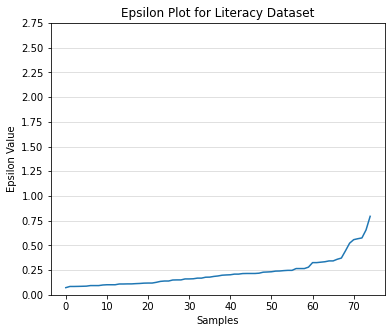

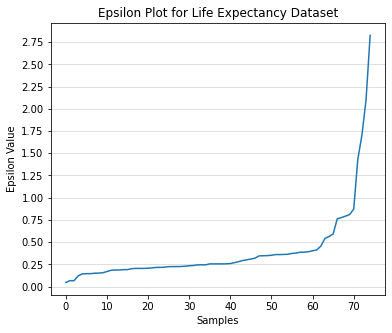

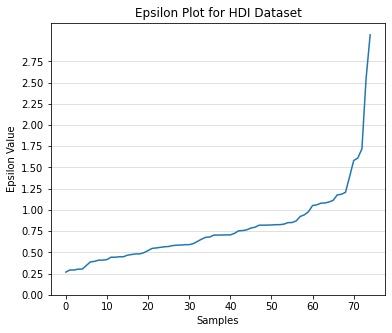

In [80]:
def epsilon_plot(scaled_data,distances_):  
  plt.plot(distances_)
  plt.grid(color='grey', linestyle='-',axis='y',alpha=0.3)
  plt.xlabel('Samples')
  plt.ylabel('Epsilon Value')
  plt.yticks(np.arange(0,3,0.25))
  plt.show()

plt.figure(figsize=(6,5))
plt.title('Epsilon Plot for Literacy Dataset')
epsilon_plot(scaled_lite,lite_distances_)

plt.figure(figsize=(6,5))
plt.title('Epsilon Plot for Life Expectancy Dataset')
epsilon_plot(scaled_life,life_distances_)

plt.figure(figsize=(6,5))
plt.title('Epsilon Plot for HDI Dataset')
epsilon_plot(scaled_merged,merged_distances_)



In [0]:
def dbscan(eps,min_samples,scaled_data,dataset):
  dbscan=DBSCAN(eps=eps,min_samples=min_samples)
  dbscan.fit(scaled_data)
  dataset['DBSCAN Label']=dbscan.labels_
  print(np.unique(dbscan.labels_))
  return dbscan.labels_

In [82]:
print('Lite Labels')
lite_labels=dbscan(0.35,3,scaled_lite,lite_df)
print(lite_labels)


print('Life Labels')
life_labels=dbscan(0.35,3,scaled_life,life_df)
print(life_labels)

print('Merged Labels')
merged_labels=dbscan(0.45,3,scaled_merged,mixed_df)
print(merged_labels)





Lite Labels
[-1  0  1  2  3  4]
[-1  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  1  1  1  2  1  1  1
  1  1  1  1  1  1  1 -1  3  3  3  3  3  3  3  3  3  3 -1  4 -1  4  4 -1
 -1 -1 -1]
Life Labels
[-1  0  1  2  3]
[-1 -1  0  0  0  1  2  1  2  1  1  1  1  2  2  2 -1  1  1  1  1  1  1  2
  1  1  1  3  1  1  3  1  3 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1]
Merged Labels
[-1  0  1  2  3  4]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  0 -1  1  1  2  1  0 -1 -1  2 -1
  2  2 -1  2  2  2 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1  3 -1  4 -1  3  3  4
 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1]


In [83]:
pd.set_option("Max_rows",100)
mixed_df.sort_values(by='DBSCAN Label').head()

,District,Total,Female,Male,Life expectancy(In Years),Per Capita Income(In USD),DBSCAN Label
0,Kathmandu,86.3,79.8,92.2,68.55,2764,-1
36,Kailali,66.3,57.1,76.2,66.46,942,-1
73,Sarlahi,46.3,36.6,55.8,70.06,809,-1
38,Bardiya,65.4,57.9,73.5,67.26,1086,-1
39,Darchula,65.4,52.9,79.3,69.05,627,-1


In [84]:
life_df.sort_values(by='DBSCAN Label').head()

,District,Life expectancy(In Years),Per Capita Income(In USD),DBSCAN Label
0,Ramechhap,72.90,951,-1
72,Kalikot,63.64,578,-1
71,Bajura,63.92,523,-1
70,Humla,64.15,794,-1
69,Pyuthan,64.33,681,-1


In [85]:
str(life_df['DBSCAN Label'].tolist())

'[-1, -1, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, -1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 3, 1, 3, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]'

In [0]:
colors = ['purple', 'red', 'green', 'yellow', 'skyblue', 'deeppink',  'orange', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [87]:

fig=px.scatter(life_df, x= 'Life expectancy(In Years)',y='Per Capita Income(In USD)',color='DBSCAN Label',hover_data=['District'],width=600, height=400)
fig.update_layout(
    title="Clusters by DBSCAN on Life Expectancy and Per Capita dataset",
    xaxis_title="Life expectancy(In Years)",
    yaxis_title="Per Capita Income(In USD)",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="#7f7f7f"
    ),
)
fig.show()

In [88]:
lite_df.columns

Index(['District', 'Total', 'Female', 'Male', 'DBSCAN Label'], dtype='object')

In [89]:
fig=px.scatter(lite_df, x= 'Male',y='Female',color='DBSCAN Label',hover_data=['District'],width=600, height=400)
fig.update_layout(
    title="Clusters by DBSCAN on Literacy Dataset",
    xaxis_title="Male",
    yaxis_title="Female",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    ),
)
fig.show()

##**PCA** 

*For DBSCAN of merged dataset we perform PCA*

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=1)
pca =pca.fit(scaled_merged)
scaled_transformed=pca.transform(scaled_merged)

scaled_transformed_df=pd.DataFrame(scaled_transformed)
scaled_transformed_df.columns=['Feature 1','Feature 2','Feature 3']

colors = ['deeppink', 'maroon', 'green', 'yellow', 'skyblue', 'purple',  'red', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [0]:
plot_data=pd.DataFrame(scaled_transformed, columns=['Feature 1','Feature 2','Feature 3'])
plot_data['Label']=merged_labels
plot_data['District'] = mixed_df['District'].tolist()

In [92]:
fig=px.scatter(plot_data, x= 'Feature 1',y='Feature 2',color='Label',hover_data=['District'],width=600, height=400)
fig.update_layout(
    title="Clusters generated by DBSCAN on HDI Dataset",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

fig=px.scatter_3d(plot_data, x= 'Feature 1',y='Feature 2',z='Feature 3',color='Label',hover_data=['District'],width=900, height=600,size_max=7,opacity=0.7)
fig.update_layout(
    title="Clusters generated by DBSCAN on HDI Dataset 3D Visualization",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

### **K Means**

In [0]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score,calinski_harabasz_score, davies_bouldin_score

Clstr 	 Error 		 Silho	Calinski 	Davies 
2 	6335007.60 	 0.73	94.56		0.55
3 	2868750.34 	 0.53	146.47		0.52
4 	1297432.55 	 0.57	241.57		0.46
5 	803707.47 	 0.56	299.11		0.43
6 	501213.96 	 0.56	386.55		0.41
7 	327242.93 	 0.58	492.26		0.42
8 	247698.07 	 0.57	552.31		0.41
9 	166725.91 	 0.55	711.26		0.35


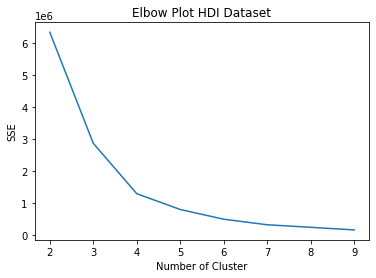

In [94]:
k_values=[]
k_inertia=[]

print('Clstr \t Error \t\t Silho\tCalinski \tDavies ')
for k in range(2,10):
    kmeans=KMeans(n_clusters=k,random_state=1)
    kmeans.fit(X_merged)
    k_values.append(k)
    k_inertia.append(kmeans.inertia_)
#     print(k,': {0:.2f}'.format(kmeans.inertia_))
#     print('Silhouette: {0:.2f}'.format(silhouette_score(X, kmeans.labels_)))
    print(k,'\t{0:.2f} \t {1:.2f}\t{2:.2f}\t\t{3:.2f}'
          .format(kmeans.inertia_,silhouette_score(X_merged, kmeans.labels_),calinski_harabasz_score(X_merged, kmeans.labels_),davies_bouldin_score(X_merged, kmeans.labels_)))
 

plt.title('Elbow Plot HDI Dataset')
plt.xlabel('Number of Cluster')
plt.ylabel('SSE')
plt.plot(k_values,k_inertia)

In [95]:
kmeans=KMeans(n_clusters=7,random_state=1)
kmeans.fit(X_merged)
print('Kmeans labelled dataset as:\n',kmeans.labels_)
# print('*'*35,'\n')
# print('The center of the clusters are:\n')
# print(kmeans.cluster_centers_)
# print('*'*35,'\n')
print('The error: ')
print(kmeans.inertia_)

Kmeans labelled dataset as:
 [1 3 4 4 0 4 0 5 0 1 0 4 0 5 5 5 2 0 2 5 4 0 0 5 0 0 4 0 0 5 0 5 0 4 6 5 5
 3 0 6 2 5 3 2 6 5 5 6 0 5 2 2 6 0 0 6 6 2 0 6 6 6 5 5 2 5 4 4 2 5 6 2 6 2
 2]
The error: 
327242.93257660803


In [0]:
scaled_transformed_df['Label']=kmeans.labels_
scaled_transformed_df['District'] = mixed_df['District'].tolist()


In [97]:
fig=px.scatter(scaled_transformed_df, x= 'Feature 1',y='Feature 2',color='Label',hover_data=['District'],width=900, height=450)
fig.update_layout(
    title="Clusters generated by KMeans on HDI Dataset",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

fig=px.scatter_3d(scaled_transformed_df, x= 'Feature 1',y='Feature 2',z='Feature 3',color='Label',hover_data=['District'],width=900, height=600,size_max=7,opacity=0.7)
fig.update_layout(
    title="Clusters generated by KMeans on HDI Dataset 3D Visualization",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()


In [0]:
from sklearn.mixture import GaussianMixture

In [102]:
gmm=GaussianMixture(n_components=7)
gmm.fit(scaled_transformed)
cluster_labels=gmm.predict(scaled_transformed)
print('Weights:\t\t\t',gmm.weights_)
print('Mean:\t\t\t\t',gmm.means_.shape)
print('Convergence reached:\t\t',gmm.converged_)
print('Covariance of each mixture:\t',gmm.covariances_.shape)
print('No of step used by best fit of EM\n to reach the convergence :\t',gmm.n_iter_)
print('Lower bound value on the log-likelihood\n of the best fit of EM:\t\t',gmm.lower_bound_)


Weights:			 [0.14251474 0.401634   0.11598484 0.02666667 0.07562265 0.11539618
 0.12218093]
Mean:				 (7, 3)
Convergence reached:		 True
Covariance of each mixture:	 (7, 3, 3)
No of step used by best fit of EM
 to reach the convergence :	 30
Lower bound value on the log-likelihood
 of the best fit of EM:		 -2.9931033938675853


In [103]:
scaled_transformed_df['GMM Label']=cluster_labels
cluster_labels

array([3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       1, 1, 1, 5, 1, 1, 5, 1, 5, 1, 1, 5, 4, 2, 1, 5, 1, 0, 1, 2, 5, 0,
       0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 4, 0, 6, 0, 4, 4, 0, 4, 6, 4,
       6, 6, 0, 6, 6, 0, 6, 6, 6])

In [105]:
fig=px.scatter(scaled_transformed_df, x= 'Feature 1',y='Feature 2',color='GMM Label',hover_data=['District'],width=900, height=450)
fig.update_layout(
    title="Clusters generated by GMM on HDI Dataset",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

fig=px.scatter_3d(scaled_transformed_df, x= 'Feature 1',y='Feature 2',z='Feature 3',color='GMM Label',hover_data=['District'],width=900, height=600,size_max=7,opacity=0.7)
fig.update_layout(
    title="Clusters 3D Visualization by GMM on HDI Dataset",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()